# Portfolio 4
## IFN646 semester 2 2023
### Arthur Guillaume N11371200


In [120]:
from biom import load_table
import pandas as pd
import numpy as np
import calour as ca

In [121]:
meta_file = "metadata.txt"
biom_file = "otu_table.biom"
phylo_file = "97_otu_taxonomy.txt"

We then import the data into calour

In [122]:
%matplotlib notebook

In [123]:
class MicrobiomeAnalysis:
    
  
    def __init__(self, biom_file, meta_file):
        self.data = ca.read_amplicon(biom_file, meta_file, normalize=10000, min_reads=1000)
        self.biom_table = load_table(biom_file)
        self.meta_table = pd.read_csv(meta_file,index_col=0, sep="\t")
        self.headers = ['ID','Kingdom','Phylum','Class','Order','Family','Genus','Specis']
    def cluster_features(self):
        self.data= self.data.cluster_features()
        
    def create_phylo_table(self, phylo_file):
        self.phylo_table = pd.read_csv(phylo_file,index_col=0,header=None,names=self.headers, sep=";|\t")
        for column in self.headers[1:]:
             self.phylo_table[column] = self.phylo_table[column].str.split('__').str[1]
        ##order by ID for faster search
        self.phylo_table=self.phylo_table.reset_index().sort_values(by='ID').reset_index(drop=True)
        self.phylo_table['Phylum'] = self.phylo_table['Phylum'].apply(lambda x : x[1:-1])
        self.phylo_table['Class'] = self.phylo_table['Class'].apply(lambda x : x[1:-1])
        
    def filter_samples(self, field, values):
        self.data = self.data.filter_samples(field, values)
        
    def filter_abundance(self, treshold):
        self.data = self.data.filter_sum_abundance(treshold)
        
    def perform_differential_abundance(self, feature,group1, group2):
        self.data = self.data.sort_samples(feature)
        self.dd = self.data.diff_abundance(feature, group1, group2,  random_seed=2018)
        self.differentially_expressed_features = self.dd.feature_metadata
        
    
    def get_feature_ids(self):
        # Access the IDs of differentially expressed features
        feature_ids = self.differentially_expressed_features.index
        return [int(feature_id) for feature_id in feature_ids]
    
    def get_taxonomy_answers(self):
        answers = []
       
        
        int_feature_ids = self.get_feature_ids()
        
        for ids in int_feature_ids:
            matching_rows = self.phylo_table[self.phylo_table["ID"] == ids]
            answer = []
            
            if not matching_rows.empty:
                for column in reversed(matching_rows.columns):
                    if(column in ["Specis","Genus" ] or len(answer)==0):
                        if matching_rows.at[matching_rows.index[0], column]:
                            answer.insert(0, matching_rows.at[matching_rows.index[0], column])
                    else:
                        break
            answers.append([ids, " ".join(answer)])
        
        return answers

    def plot_differential_abundance(self, field):
        self.dd.plot(sample_field=field, gui='jupyter')


## Task 1

2023-10-15 21:48:32 INFO loaded 290 samples, 4572 features
2023-10-15 21:48:32 WARNING Found 1 samples that have metadata but do not have data. These samples have been dropped.
2023-10-15 21:48:32 INFO First 5 samples without data: ['524.ESC.1.54.OPR']
2023-10-15 21:48:32 INFO Loaded 290 samples, 4572 features
2023-10-15 21:48:32 INFO After filtering, 272 samples remaining.
2023-10-15 21:48:32 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:32 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:34 INFO 272 samples with both values
2023-10-15 21:48:34 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:34 INFO 136 samples with value 1 (Nose), 136 samples with value2 (Throat)
2023-10-15 21:48:36 INFO number of higher in Nose: 594. number of higher in Throat : 600. total 1194


C:\Users\lorie\AppData\Local\Temp\ipykernel_10980\1602292730.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.phylo_table = pd.read_csv(phylo_file,index_col=0,header=None,names=self.headers, sep=";|\t")


<IPython.core.display.Javascript object>


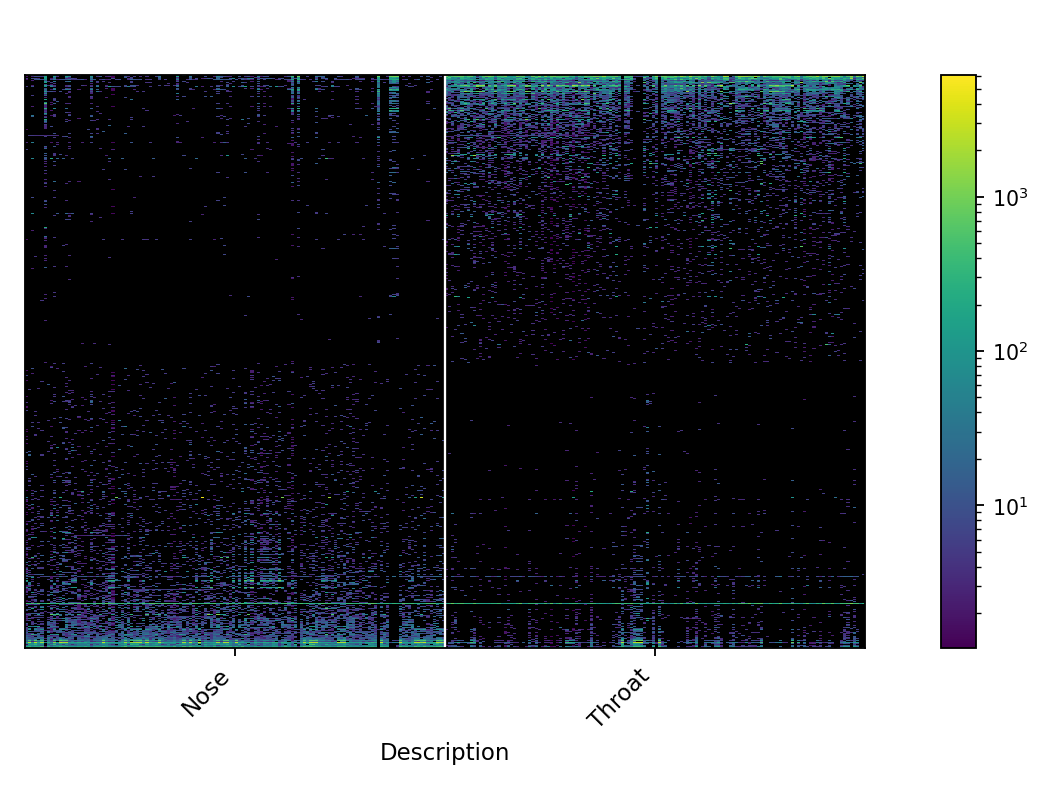

2023-10-15 21:48:43 WARNING REST error Forbidden encountered when accessing dbBact stats/get_supported_version


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px'))

In [124]:
task1 = MicrobiomeAnalysis(biom_file, meta_file)
task1.filter_abundance(10)
task1.cluster_features()
task1.perform_differential_abundance('Description','Nose','Throat')

task1.create_phylo_table(phylo_file)

task1_answer = task1.get_taxonomy_answers()
task1.plot_differential_abundance('Description')

In [125]:
print(task1_answer)

[[252119, 'Micrococcaceae'], [4465561, 'Prevotella melaninogenica'], [261241, 'Granulicatella'], [342427, 'Veillonella dispar'], [301574, 'Streptococcus'], [1105219, 'Campylobacter'], [3866487, 'Oribacterium'], [516611, 'Streptococcus'], [4452538, 'Fusobacterium'], [778484, 'Actinomyces'], [977292, '[Prevotella]'], [652731, 'Paludibacter'], [1887417, 'M7-'], [4396516, 'Lachnospiraceae'], [272150, 'Streptococcus'], [4405869, 'Fusobacterium'], [4476186, 'Prevotella stercorea'], [1144463, 'Veillonella'], [274257, 'Bulleidia'], [1019594, 'Lachnospiraceae'], [4393019, 'Catonella'], [218785, 'Neisseria'], [4295238, '[Prevotella]'], [341460, 'Haemophilus'], [4475758, 'Veillonella dispar'], [518743, 'Veillonella parvula'], [4401373, 'Veillonella dispar'], [4297119, 'Leptotrichia'], [875735, 'Actinomyces'], [258034, 'Selenomonas'], [4451251, 'Atopobium'], [523036, 'Gemellaceae'], [4447605, 'Lachnospiraceae'], [1903527, 'Megasphaera'], [2171537, 'Porphyromonas'], [349539, 'F16'], [259015, 'Veill

# Task 2 

2023-10-15 21:48:43 INFO loaded 290 samples, 4572 features
2023-10-15 21:48:43 WARNING Found 1 samples that have metadata but do not have data. These samples have been dropped.
2023-10-15 21:48:43 INFO First 5 samples without data: ['524.ESC.1.54.OPR']
2023-10-15 21:48:43 INFO Loaded 290 samples, 4572 features
2023-10-15 21:48:43 INFO After filtering, 272 samples remaining.
2023-10-15 21:48:43 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:43 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:44 INFO 272 samples with both values
2023-10-15 21:48:44 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:44 INFO 135 samples with value 1 (Yes), 137 samples with value2 (No)
2023-10-15 21:48:47 INFO number of higher in Yes: 79. number of higher in No : 31. total 110


C:\Users\lorie\AppData\Local\Temp\ipykernel_10980\1602292730.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.phylo_table = pd.read_csv(phylo_file,index_col=0,header=None,names=self.headers, sep=";|\t")


<IPython.core.display.Javascript object>


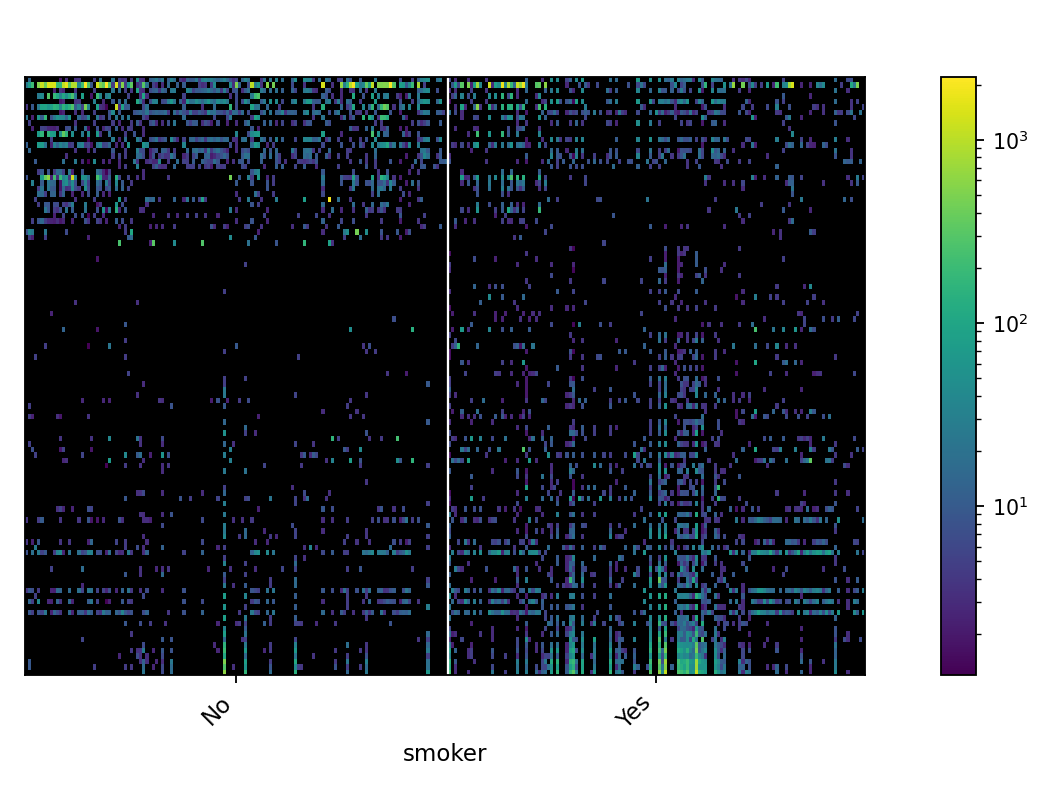

2023-10-15 21:48:54 WARNING REST error Forbidden encountered when accessing dbBact stats/get_supported_version


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px'))

In [126]:
task2 = MicrobiomeAnalysis(biom_file, meta_file)
task2.filter_abundance(10)
task2.cluster_features()
task2.perform_differential_abundance('smoker', 'Yes', 'No')

task2.create_phylo_table(phylo_file)

task2_answer = task2.get_taxonomy_answers()
task2.plot_differential_abundance('smoker')

In [127]:
print(task2_answer)

[[307401, 'Cyclobacteriaceae'], [218785, 'Neisseria'], [269755, 'Candidatus Rhodoluna'], [557665, 'Prevotella'], [4361797, 'Flavobacterium'], [4433523, 'Capnocytophaga'], [252679, 'Leuconostoc fallax'], [4443201, 'Tannerella'], [4454893, 'Flavobacterium'], [3297209, 'Rhodocyclaceae'], [171202, 'Prevotella'], [71577, 'Flavobacterium'], [347882, 'RF16'], [229011, 'Cytophagaceae'], [4309997, 'Fluviicola'], [1132940, 'Cronobacter sakazakii'], [332355, 'Zoogloea'], [301251, 'Prevotella'], [4451646, 'Capnocytophaga'], [4484389, 'Bergeriella denitrificans'], [1036557, 'Neisseria subflava'], [677680, '[Prevotella]'], [223957, 'Ralstonia'], [4468073, 'Capnocytophaga'], [1026498, 'Eikenella'], [557093, 'Enterobacteriaceae'], [4062647, 'Kingella'], [229289, 'Polynucleobacter'], [610111, 'Prevotella'], [712179, 'Prevotella'], [292322, 'Sphingopyxis alaskensis'], [177068, 'Clostridiales'], [367456, 'Blautia'], [317703, 'Erysipelotrichaceae'], [4471854, 'Coprococcus'], [179067, 'Clostridiales'], [18

# Task 3

2023-10-15 21:48:54 INFO loaded 290 samples, 4572 features
2023-10-15 21:48:54 WARNING Found 1 samples that have metadata but do not have data. These samples have been dropped.
2023-10-15 21:48:54 INFO First 5 samples without data: ['524.ESC.1.54.OPR']
2023-10-15 21:48:54 INFO Loaded 290 samples, 4572 features
2023-10-15 21:48:54 INFO After filtering, 272 samples remaining.
2023-10-15 21:48:54 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:54 INFO After filtering, 2171 features remaining.
2023-10-15 21:48:55 INFO 136 samples with both values
2023-10-15 21:48:55 INFO After filtering, 1792 features remaining.
2023-10-15 21:48:55 INFO 67 samples with value 1 (Yes), 69 samples with value2 (No)
2023-10-15 21:48:57 INFO number of higher in Yes: 107. number of higher in No : 29. total 136


C:\Users\lorie\AppData\Local\Temp\ipykernel_10980\1602292730.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.phylo_table = pd.read_csv(phylo_file,index_col=0,header=None,names=self.headers, sep=";|\t")


<IPython.core.display.Javascript object>


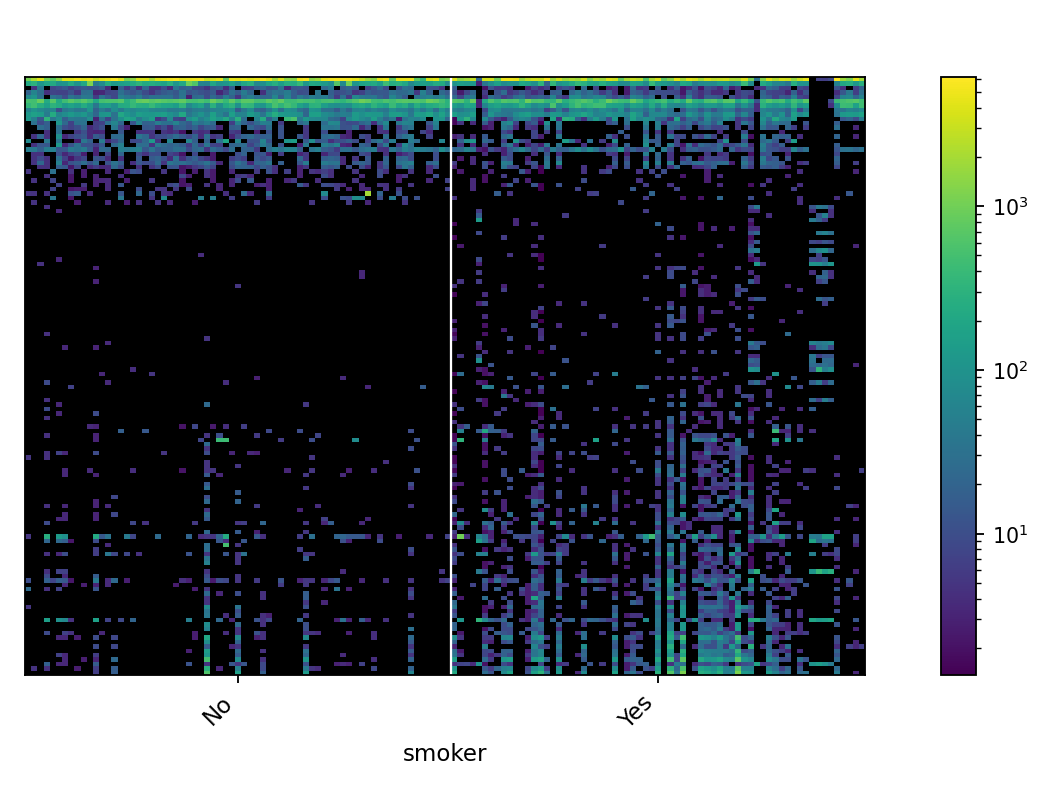

2023-10-15 21:49:03 WARNING REST error Forbidden encountered when accessing dbBact stats/get_supported_version


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px'))

In [128]:
task3_nose = MicrobiomeAnalysis(biom_file, meta_file)
task3_nose.filter_abundance(10)
task3_nose.cluster_features()
task3_nose.filter_samples('Description','Nose')
task3_nose.perform_differential_abundance('smoker', 'Yes', 'No')

task3_nose.create_phylo_table(phylo_file)

task3_answer_nose = task3_nose.get_taxonomy_answers()
task3_nose.plot_differential_abundance('smoker')

2023-10-15 21:49:03 INFO loaded 290 samples, 4572 features
2023-10-15 21:49:03 WARNING Found 1 samples that have metadata but do not have data. These samples have been dropped.
2023-10-15 21:49:03 INFO First 5 samples without data: ['524.ESC.1.54.OPR']
2023-10-15 21:49:03 INFO Loaded 290 samples, 4572 features
2023-10-15 21:49:03 INFO After filtering, 272 samples remaining.
2023-10-15 21:49:04 INFO After filtering, 2171 features remaining.
2023-10-15 21:49:04 INFO After filtering, 2171 features remaining.
2023-10-15 21:49:05 INFO 136 samples with both values
2023-10-15 21:49:05 INFO After filtering, 1682 features remaining.
2023-10-15 21:49:05 INFO 68 samples with value 1 (Yes), 68 samples with value2 (No)
2023-10-15 21:49:07 INFO number of higher in Yes: 25. number of higher in No : 39. total 64


C:\Users\lorie\AppData\Local\Temp\ipykernel_10980\1602292730.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.phylo_table = pd.read_csv(phylo_file,index_col=0,header=None,names=self.headers, sep=";|\t")


<IPython.core.display.Javascript object>


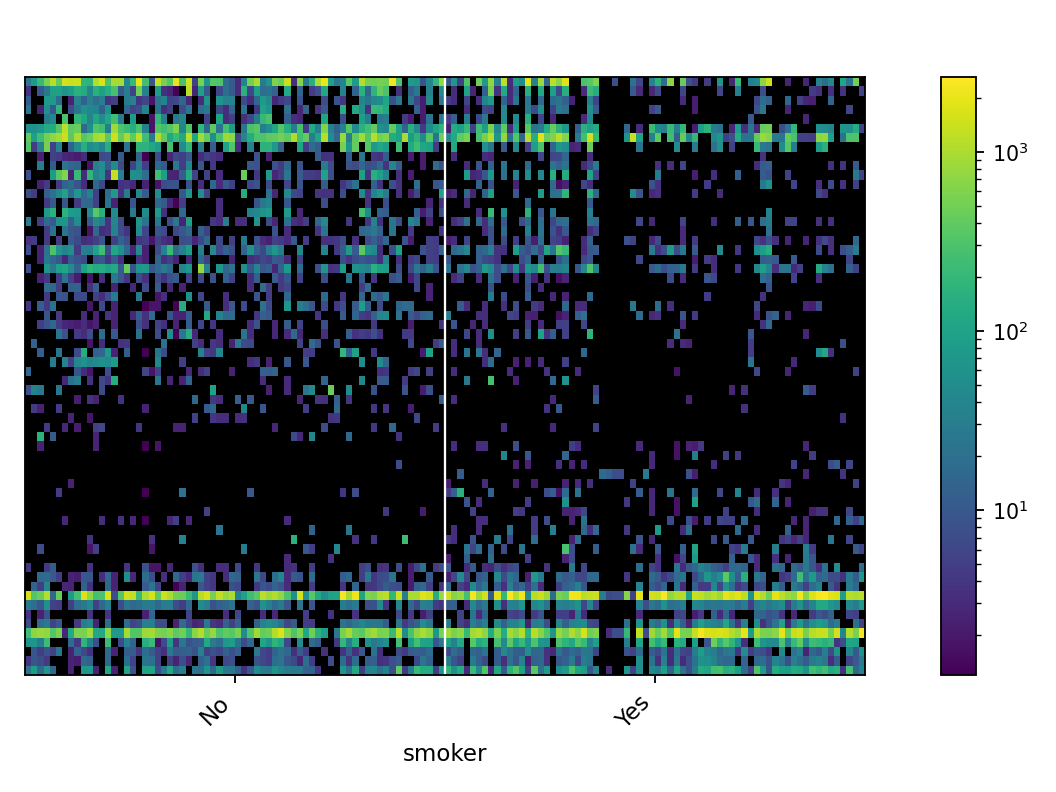

2023-10-15 21:49:13 WARNING REST error Forbidden encountered when accessing dbBact stats/get_supported_version


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px'))

In [129]:
task3_throat = MicrobiomeAnalysis(biom_file, meta_file)
task3_throat.filter_abundance(10)
task3_throat.cluster_features()
task3_throat.filter_samples('Description','Throat')
task3_throat.perform_differential_abundance('smoker', 'Yes', 'No')

task3_throat.create_phylo_table(phylo_file)

task3_answer_throat = task3_throat.get_taxonomy_answers()
task3_throat.plot_differential_abundance('smoker')

In [130]:
#compare results with task 2
print(f"Answer nose has {len(task3_answer_nose)} elements, Answer throat has {len(task3_answer_throat)} elements and task2:{len(task2_answer)}")

Answer nose has 136 elements, Answer throat has 64 elements and task2:110


We do not observe the same number of differentially abundant bacteria in the nose and throat compared to the entire pooled sample (136 and 64 vs. 110). In task 2, we examine all the samples. In task 3, we study subsamples of task 2, focusing on samples from the throat and nose separately. We do not obtain identical results. In task 2, we investigate the global impact of smoking, but we might overlook specific differences due to the sampling location. For a given bacterium present in both the nose and throat, differences in abundance might go unnoticed because, if the abundance is substantial, a change in only a portion of the samples might be too small to be statistically significant. Moreover, smoking could have opposing effects in the throat and the nose, and both effects might counteract each other, even though they would be significant if we only considered the nose or throat.